<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [106]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [108]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


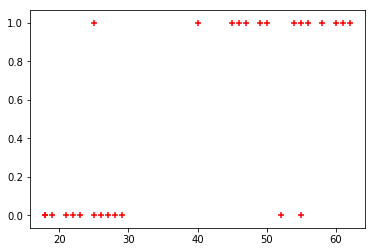

In [109]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [83]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [100]:
X_test

,age
25,54
24,50
21,26


In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [102]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
X_test

,age
25,54
24,50
21,26


In [111]:
y_predicted = model.predict(X_test)

In [105]:
model.predict_proba(X_test)

array([[ 0.25566869,  0.74433131],
       [ 0.29592482,  0.70407518],
       [ 0.58520192,  0.41479808]])

In [110]:
model.score(X_test,y_test)

1.0

In [114]:
X_test

,age
25,54
24,50
21,26


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model